In [1]:
import kagglehub

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("vinayakshanawad/cement-manufacturing-concrete-dataset")


In [3]:
print("Path to dataset files:", path)


Path to dataset files: /data/ephemeral/home/.cache/kagglehub/datasets/vinayakshanawad/cement-manufacturing-concrete-dataset/versions/1


In [9]:
path = "/data/ephemeral/home/.cache/kagglehub/datasets/vinayakshanawad/cement-manufacturing-concrete-dataset/versions/1"

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
import pandas as pd
df = pd.read_csv(path + "/concrete.csv")

df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [125]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
df.corr()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [12]:
import torch

In [13]:
import sklearn

In [14]:
train,test = sklearn.model_selection.train_test_split(df, test_size=0.2, random_state=42)

In [15]:
class ConcreteDataset(torch.utils.data.Dataset):
    def __init__(self, df, mean,std):
        self.df = df
        self.mean = mean
        self.std = std


    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        x = self.df.iloc[idx][['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']].to_numpy()
        y = self.df.iloc[idx][['strength']].to_numpy()
        x = torch.tensor(x, dtype=torch.float32)    
        y = torch.tensor(y, dtype=torch.float32)
        x = (x - self.mean[:-1]) / self.std[:-1]
        # y = (y - self.mean[7]) / self.std[7]
        y = torch.log(y)
        # if self.transform:
        #     x = self.transform(x)
            
        return x, y

In [16]:
# dataset = ConcreteDataset(df)

# dataset[0]

In [18]:
train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
995,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52
507,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,28,33.94
334,323.7,282.8,0.0,183.8,10.3,942.7,659.9,3,28.30
848,252.3,0.0,98.8,146.3,14.2,987.8,889.0,56,55.83
294,238.2,158.8,0.0,185.7,0.0,1040.6,734.3,28,26.91
...,...,...,...,...,...,...,...,...,...
87,212.5,0.0,100.4,159.3,8.7,1007.8,903.6,14,26.31
330,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,14,31.81
466,439.0,177.0,0.0,186.0,11.1,884.9,707.9,3,39.30
121,250.0,0.0,95.7,191.8,5.3,948.9,857.2,56,39.64


In [17]:
mean = train[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']].to_numpy().mean(axis=0)
std = train[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']].to_numpy().std(axis=0)
mean = torch.tensor(mean, dtype=torch.float32)
std = torch.tensor(std, dtype=torch.float32)

In [19]:
# import torchvision.transforms as transforms
# transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
dataset_train = ConcreteDataset(train,mean,std)
dataset_test = ConcreteDataset(test,mean,std)


In [20]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset_train, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=100, shuffle=False)

In [21]:
class simple_nn(torch.nn.Module):
    def __init__(self):
        super(simple_nn, self).__init__()
        self.fc1 = torch.nn.Linear(8, 16)
        self.fc2 = torch.nn.Linear(16, 32)
        self.fc3 = torch.nn.Linear(32, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        xf = self.fc3(x)
        return xf,x


In [50]:
model = simple_nn()
model.cuda()

simple_nn(
  (fc1): Linear(in_features=8, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

In [51]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [52]:
import numpy as np
losses = []
val_losses = []
errors = []
for i in range(200):
    Lo = []
    for inputs, outputs in train_loader:
        inputs = inputs.cuda()
        outputs = outputs.cuda()
        model.zero_grad()
        pred,_ = model(inputs)
        loss = torch.nn.MSELoss()(pred, outputs)
        
        loss.backward()
        optimizer.step()
        Lo.append(loss.item())
    
    losses.append(np.mean(Lo))
    err = []
    vLo = []
    for inputs, outputs in test_loader:
        inputs = inputs.cuda()
        outputs = outputs.cuda()
        pred,_ = model(inputs)
        loss = torch.nn.MSELoss()(pred, outputs)
        vLo.append(loss.item())
        err.append(abs(torch.exp(pred.detach().cpu())- torch.exp(outputs.detach().cpu())).numpy())
    errors.append(np.concatenate(err,axis=0).mean())
    val_losses.append(np.mean(vLo))
    print(f'losses: {np.mean(losses)}')
    print(f'val_losses: {np.mean(val_losses)}')
    print(f'errors: {np.concatenate(err,axis=0).mean()}')

losses: 12.827824698554146
val_losses: 13.359480857849121
errors: 35.07183074951172
losses: 12.54899591869778
val_losses: 12.980097611745197
errors: 34.97074508666992
losses: 12.203702220210323
val_losses: 12.579059176974825
errors: 34.84500503540039
losses: 11.849495437410143
val_losses: 12.144580284754435
errors: 34.674137115478516
losses: 11.45729791853163
val_losses: 11.665739186604817
errors: 34.42488098144531
losses: 11.019202991768166
val_losses: 11.1326441499922
errors: 34.034027099609375
losses: 10.526872551630413
val_losses: 10.539772896539597
errors: 33.376014709472656
losses: 9.984488361411625
val_losses: 9.898152351379395
errors: 32.24207305908203
losses: 9.402301526363985
val_losses: 9.227596150504219
errors: 30.202180862426758
losses: 8.802138612005447
val_losses: 8.557985870043437
errors: 26.853151321411133
losses: 8.202048991665695
val_losses: 7.920596249175795
errors: 23.49087905883789
losses: 7.637614451072834
val_losses: 7.344267858399285
errors: 23.957584381103516


In [53]:
len(val_losses)


200

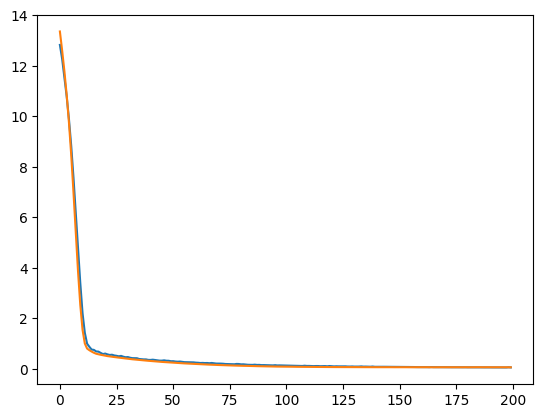

In [54]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.plot(val_losses)
plt.show()


In [55]:
# np.concatenate(errors,axis=0).shape

In [56]:
np.array(errors).shape

(200,)

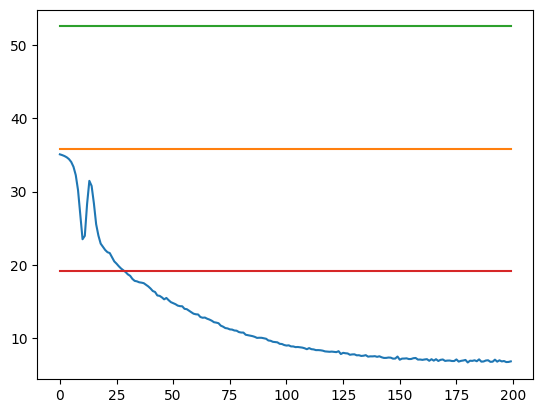

In [57]:
plt.plot(np.array(errors))
plt.plot(len(errors)*[np.mean(df['strength'].to_numpy())])
plt.plot(len(errors)*[np.mean(df['strength'].to_numpy())+np.std(df['strength'].to_numpy())])
plt.plot(len(errors)*[np.mean(df['strength'].to_numpy())-np.std(df['strength'].to_numpy())])
plt.show()

In [58]:
# plt.scatter(pred_y, residuals, alpha=0.7)


NameError: name 'pred_y' is not defined

In [59]:
mean

tensor([279.9654,  75.6909,  53.2195, 181.9832,   6.1572, 972.9185, 772.8320,
         45.7015,  35.7656])

In [61]:

err = []
mean_err = []
pred_y = []

for inputs, outputs in test_loader:
    inputs = inputs.cuda()
    outputs = outputs.cuda()
    pred,_ = model(inputs)
    loss = torch.nn.MSELoss()(pred, outputs)
    val_losses.append(loss.item())
    pred_y.append(torch.exp(pred.detach().cpu()).numpy())
    y_p = (torch.exp(pred.detach().cpu())- torch.exp(outputs.detach().cpu()))**2
    y_t = (mean[-1].repeat(outputs.shape[0]).reshape(outputs.shape[0],1) - torch.exp(outputs.detach().cpu()))**2
    err.append(y_p.numpy())
    mean_err.append(y_t.numpy())


In [63]:
test[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']].to_numpy().shape

(206, 8)

In [64]:
err = np.concatenate(err,axis=0)
mean_err = np.concatenate(mean_err,axis=0)


In [65]:
pred_y = np.concatenate(pred_y,axis=0)

In [66]:
print(err.shape)
print(mean_err.shape)
print(pred_y.shape)

(206, 1)
(206, 1)
(206, 1)


In [68]:
1030

1030

In [69]:
print(1- np.mean(err)/np.mean(mean_err))

0.6032081842422485


In [70]:
n = 1030
p = 8

In [71]:
print(1- (np.mean(err)/(n-p-1))/(np.mean(mean_err)/(n-1)))

0.6000991352500664


In [72]:
max(err)

array([2991.5735], dtype=float32)

In [73]:
err[np.where(err < 100)[1]].shape

(163, 1)

In [74]:
err[np.where(err < 300)[1]].shape

(188, 1)

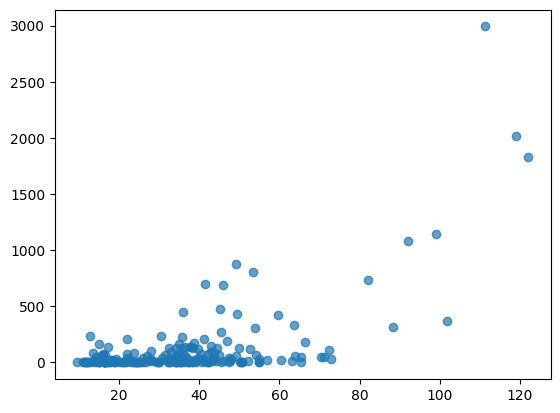

In [75]:
plt.scatter(pred_y,err, alpha=0.7)


In [76]:
# !pip install statsmodels

In [77]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm


In [78]:
err.flatten().shape

(206,)

In [80]:
X_with_const = sm.add_constant(test[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']].to_numpy())  # 상수항 추가
bp_test = het_breuschpagan(err.flatten(), X_with_const)


In [81]:
print("Breusch-Pagan Test Results:")
print(f"Lagrange Multiplier Statistic: {bp_test[0]}")
print(f"p-value: {bp_test[1]}")
print(f"F-statistic: {bp_test[2]}")
print(f"F-statistic p-value: {bp_test[3]}")


Breusch-Pagan Test Results:
Lagrange Multiplier Statistic: 25.629721153067834
p-value: 0.001214962520734009
F-statistic: 3.499090246070383
F-statistic p-value: 0.0008395971342929447


In [82]:
if bp_test[1] < 0.05:
    print("The assumption of homoscedasticity is violated.")
else:
    print("The assumption of homoscedasticity is satisfied.")


The assumption of homoscedasticity is violated.


(array([ 1.,  1.,  1.,  3.,  2.,  5.,  7.,  7.,  4., 14.,  7., 11., 15.,
        18.,  9., 18., 18.,  5., 16., 16.,  6., 11.,  9., 13., 15., 14.,
        23., 21., 24., 20., 11., 16., 11., 16., 18., 12., 23., 19., 34.,
        21., 14., 15., 16., 23., 19., 22., 27., 16., 25., 19., 10., 16.,
        23.,  6., 13., 11.,  8.,  9.,  7.,  9., 15.,  8., 13., 12.,  8.,
        10., 15., 13.,  5.,  1.,  8.,  5.,  6.,  6.,  7.,  2.,  3.,  6.,
         4.,  5.,  8.,  5.,  3.,  2.,  1.,  5.,  4.,  1.,  3.,  4.,  2.,
         1.,  2.,  4.,  0.,  5.,  2.,  1.,  1.,  1.]),
 array([ 2.33  ,  3.1327,  3.9354,  4.7381,  5.5408,  6.3435,  7.1462,
         7.9489,  8.7516,  9.5543, 10.357 , 11.1597, 11.9624, 12.7651,
        13.5678, 14.3705, 15.1732, 15.9759, 16.7786, 17.5813, 18.384 ,
        19.1867, 19.9894, 20.7921, 21.5948, 22.3975, 23.2002, 24.0029,
        24.8056, 25.6083, 26.411 , 27.2137, 28.0164, 28.8191, 29.6218,
        30.4245, 31.2272, 32.0299, 32.8326, 33.6353, 34.438 , 35.2407,
        

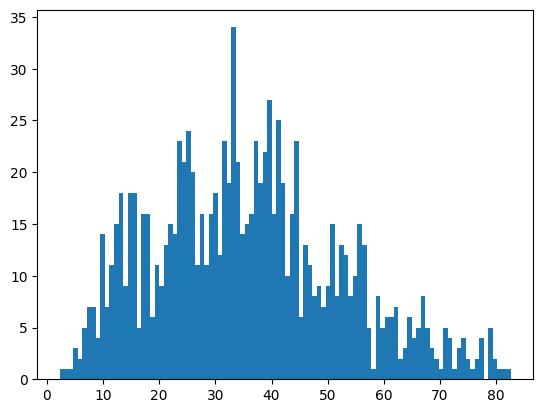

In [83]:
# df['strength'].to_numpy()
plt.hist(df['strength'].to_numpy(),bins=100)

In [87]:
feature_list = []
for inputs, outputs in test_loader:
    inputs = inputs.cuda()
    outputs = outputs.cuda()
    pred,features = model(inputs)
    features = features.detach().cpu().numpy()
    feature_list.extend(features)
feature_list = np.array(feature_list)

In [43]:
feature_list.shape

(1030, 32)

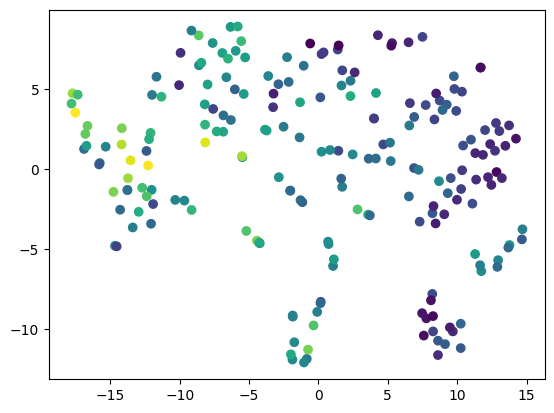

In [89]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne.fit_transform(feature_list)
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], c=test['strength'].to_numpy())
plt.show()

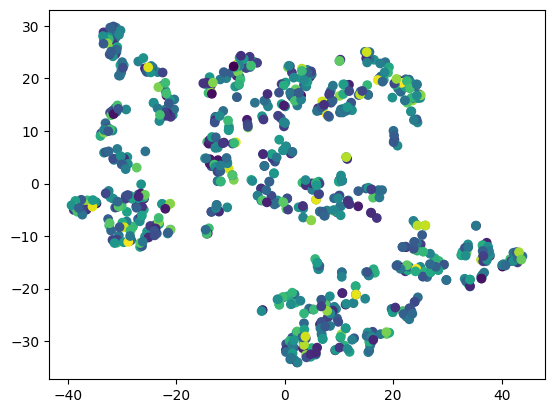

In [91]:
feature_list = []
for inputs, outputs in train_loader:
    inputs = inputs.cuda()
    outputs = outputs.cuda()
    pred,features = model(inputs)
    features = features.detach().cpu().numpy()
    feature_list.extend(features)
feature_list = np.array(feature_list)
tsne.fit_transform(feature_list)
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], c=train['strength'].to_numpy())
plt.show()

In [46]:
model

simple_nn(
  (fc1): Linear(in_features=8, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

In [48]:
mean[:-1]

tensor([280.1015,  75.5017,  53.0863, 182.0931,   6.1760, 972.9208, 773.0807,
         45.5150])

In [49]:
std[:-1]

tensor([104.3662,  87.4915,  63.7361,  21.3201,   5.9781,  76.6903,  80.4051,
         62.8134])

In [93]:
import tqdm

In [107]:
flag = 0
save_SSE = []
save_SST = []
patience = 10
lr_decay_factor = 0.5  
for x,y in tqdm.tqdm(test_loader):
    x = x.cuda()
    y = y.cuda()
    # print(x.shape)
    # brewa
    y_opt = y.detach()
    init_x = torch.randn(x.shape[0],x.shape[1], device='cuda', requires_grad=True) # .requires_grad_(True).cuda()
    # init_x = mean[:-1].expand(10,8).clone().requires_grad_(True)
    init_x.requires_grad = True
    optimizer = optim.Adam([init_x], lr=0.1)
    
    
    for param in model.parameters():
        param.requires_grad = False

    min_val = 1e6
    min_yp = None
    min_yt = None

    no_improve_epochs = 0

    for i in range(10000):
        optimizer.zero_grad()
        # with torch.no_grad():
        pred,features = model(init_x)
        loss = torch.nn.MSELoss()(pred, y_opt)
        loss.backward()
        optimizer.step()
        if loss.item() < min_val:
            min_val = loss.item()
            min_yp = (init_x.detach().cpu()*std[:-1] - x.detach().cpu()*std[:-1])**2
            min_yt = (mean[:-1].repeat(init_x.shape[0]).reshape(init_x.shape[0],-1) - x.detach().cpu()*std[:-1])**2
        
            # print(min_x.mean())
        else:
            no_improve_epochs += 1
        
        if no_improve_epochs > patience:
            optimizer.param_groups[0]['lr'] *= lr_decay_factor
            # print(f'lr decayed to {optimizer.param_groups[0]["lr"]}')
            no_improve_epochs = 0
        # print((init_x.detach().cpu() - x.cpu()).numpy().mean())
    
    save_SSE.append(min_yp.numpy())
    save_SST.append(min_yt.numpy())
    


100%|██████████| 3/3 [00:27<00:00,  9.25s/it]


In [112]:
save_SSE = np.concatenate(save_SSE,axis=0)
save_SST = np.concatenate(save_SST,axis=0)
print(save_SSE.shape)
print(save_SST.shape)
print(1- np.mean(save_SSE)/np.mean(save_SST))


(206, 8)
(206, 8)
0.9512221962213516


In [101]:
# save = torch.tensor(np.array(save))*std[7] + mean[7]


In [102]:
std# np.concatenate(save1,axis=0).shape

tensor([104.5455,  87.5851,  63.9482,  21.3199,   5.9458,  76.6561,  80.2817,
         63.2510,  16.6423])

In [113]:
save_SSE.shape

(206, 8)

In [117]:
save_SSE.mean(axis=1).shape

(206,)

In [118]:
save_SST.mean(axis=1).shape

(206,)

In [119]:
# save_SSE.mean(axis=1).shape

In [120]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [121]:
1 - (save_SSE.mean(axis=0) / save_SST.mean(axis=0))

array([ 0.72862595, -0.41315353, -0.25725543,  0.9766509 , -0.19901109,
        0.98789907,  0.9753307 ,  0.16730648], dtype=float32)

In [124]:
df.columns


Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

(array([3., 1., 0., 0., 0., 1., 0., 0., 2., 1.]),
 array([0.01210095, 0.15220621, 0.29231146, 0.43241674, 0.57252198,
        0.71262723, 0.85273248, 0.99283773, 1.13294303, 1.27304828,
        1.41315353]),
 <BarContainer object of 10 artists>)

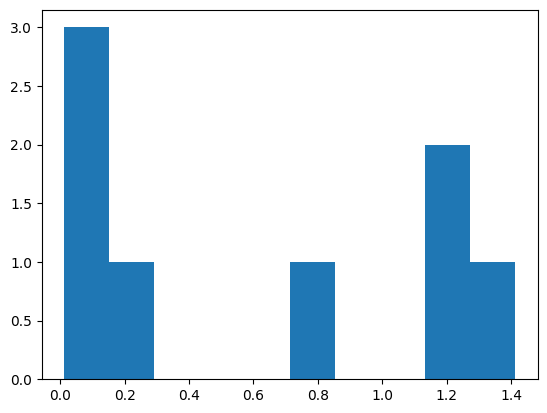

In [122]:
plt.hist(save_SSE.mean(axis=0) / save_SST.mean(axis=0))

In [250]:
# plt.hist(save1.mean(axis=1),bins=100)


In [154]:
std

tensor([103.7299,  87.5987,  63.7379,  21.3921,   5.9165,  76.1287,  80.1190,
         63.6713,  16.6320])

In [155]:
mean

tensor([279.3396,  75.9091,  53.5494, 182.0205,   6.1600, 973.1346, 772.6256,
         46.0563,  35.8011])